In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('../data/CFC_GPS_Data.csv', encoding='latin1')

df.head()

,date,opposition_code,opposition_full,md_plus_code,md_minus_code,season,distance,distance_over_21,distance_over_24,distance_over_27,accel_decel_over_2_5,accel_decel_over_3_5,accel_decel_over_4_5,day_duration,peak_speed,hr_zone_1_hms,hr_zone_2_hms,hr_zone_3_hms,hr_zone_4_hms,hr_zone_5_hms
0,02/08/2022,NaN,NaN,10,-4,2022/2023,4524.085076,89.278530,85.690318,61.634335,119.108101,32.636928,8.557443,76.242369,30.75590,00:03:40,00:17:29,00:19:20,00:11:23,00:00:02
1,03/08/2022,NaN,NaN,10,-3,2022/2023,5264.645855,245.861691,91.348143,20.210588,45.974019,6.309730,3.095990,65.217830,28.67495,00:06:44,00:16:40,00:15:35,00:06:08,00:00:01
2,04/08/2022,NaN,NaN,10,-2,2022/2023,6886.542272,199.180260,84.634735,22.585470,97.488512,24.400180,3.825869,105.139759,29.21720,00:17:29,00:37:09,00:23:49,00:06:30,00:00:02
3,05/08/2022,NaN,NaN,10,-1,2022/2023,2622.552016,68.389321,11.795402,6.360193,43.750265,14.642925,2.189602,64.588434,28.70300,00:07:34,00:15:51,00:07:31,00:01:51,00:00:00
4,06/08/2022,EVE,Everton,0,0,2022/2023,5654.028319,447.090545,164.576671,82.746430,122.568127,49.748446,22.201737,46.048353,30.29812,00:01:09,00:01:04,00:11:34,00:13:15,00:02:30


In [11]:
df.describe()

,md_plus_code,md_minus_code,distance,distance_over_21,distance_over_24,distance_over_27,accel_decel_over_2_5,accel_decel_over_3_5,accel_decel_over_4_5,day_duration,peak_speed
count,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,3.489559,-3.482599,4348.397275,206.384127,87.730266,32.143318,93.532909,30.914458,9.413703,62.351265,24.327300
std,3.246978,3.239427,2841.399651,214.513552,103.481000,43.921496,64.593942,24.278089,8.803952,35.677410,10.914528
min,0.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-5.000000,2711.332083,40.067120,11.019218,1.239599,50.181008,14.031534,2.862817,45.343532,26.884825
50%,2.000000,-2.000000,4229.806525,140.624828,52.006816,14.919966,91.089483,27.642968,7.496299,67.636717,28.763600
75%,5.000000,-1.000000,6021.526515,292.186658,127.505919,43.802949,134.137148,44.412446,13.057154,85.325991,30.357408
max,10.000000,0.000000,15653.250800,1011.791940,543.629710,286.564259,326.736174,119.575568,43.411480,212.770547,32.937000


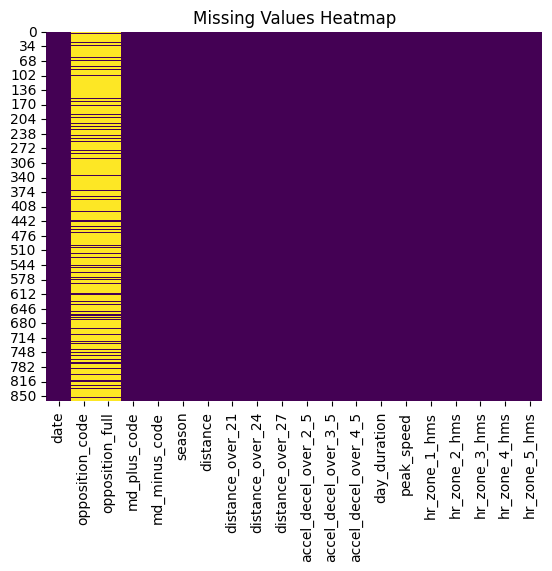

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values")
plt.show()

- The yellow bars indicate missing values.
- The dataset has missing values primarily in the opposition_code and opposition_full columns.

Might have to add placeholder value here

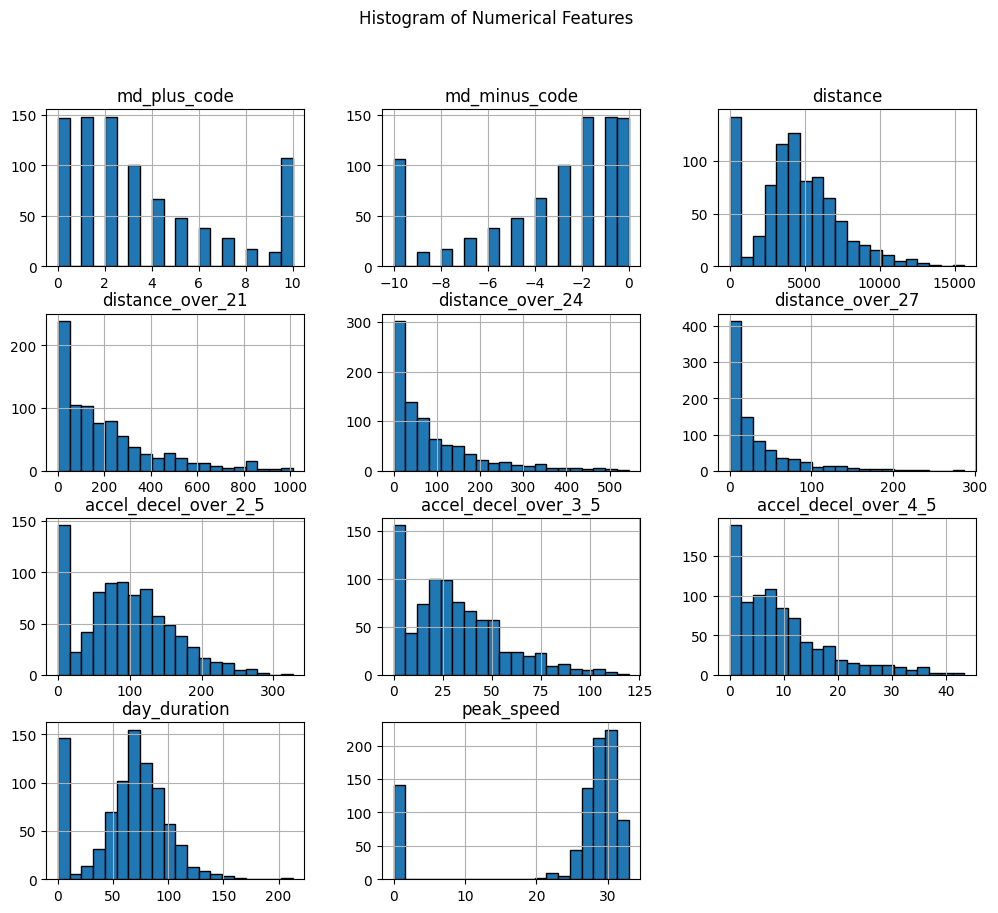

In [ ]:
# Distribution of numerical columns
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.show()

- distance, acceleration, and peak speed have right-skewed distributions. So, might have to do log transformation.

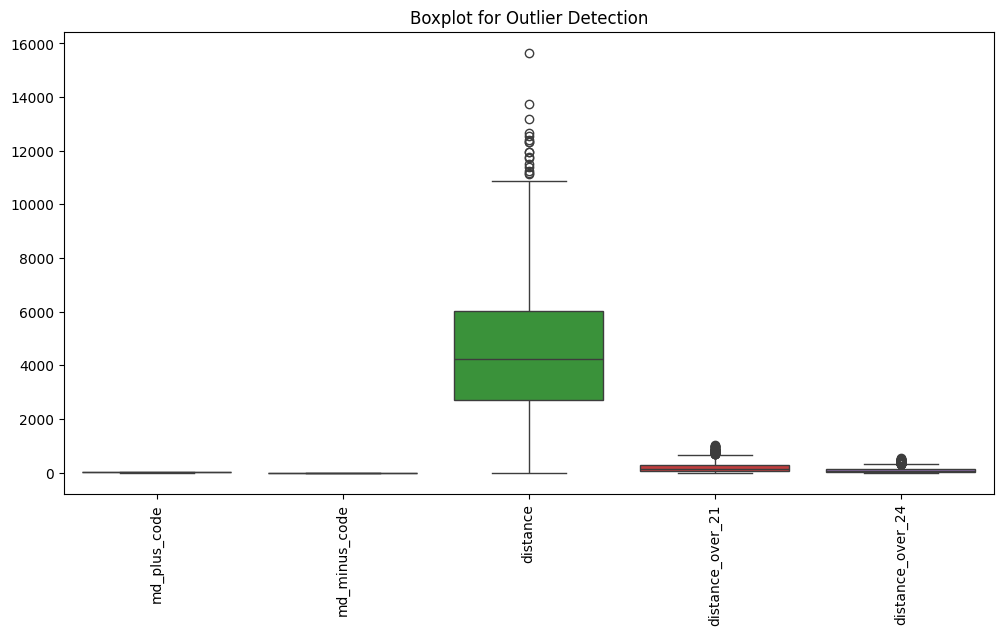

In [18]:
# Boxplots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

- Outliers in distance may be valid extreme performances. Maybe Caicedo going nuts during practice. 

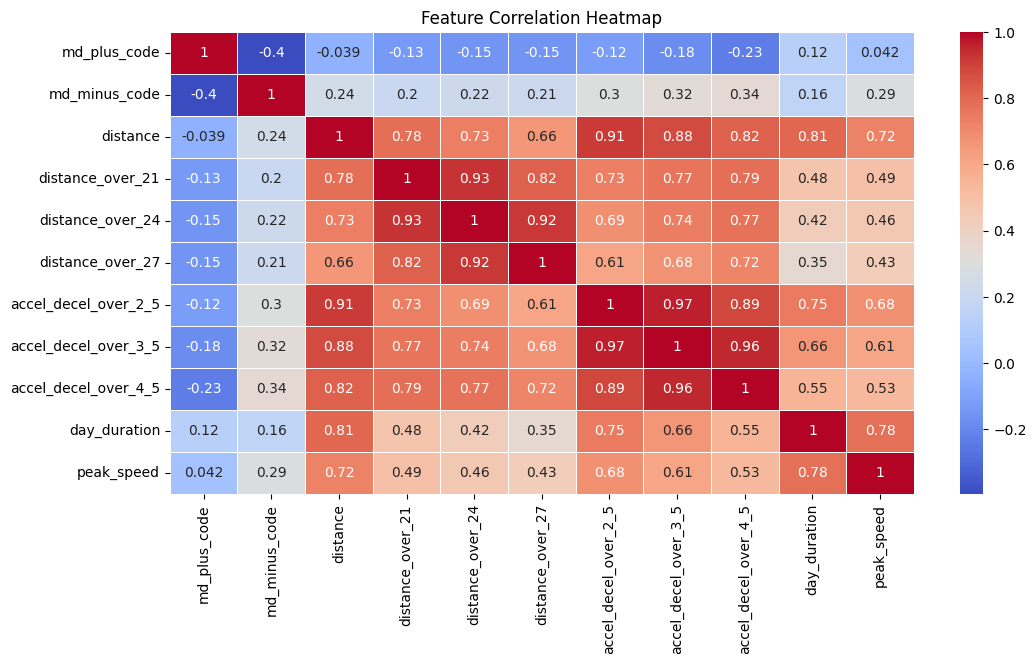

In [20]:
# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#### 1. Strong Positive Correlations (Highly Related Features)
Distance vs. Distance Over 21/24/27 (0.78, 0.73, 0.66):
> This makes sense since total distance covered should naturally relate to distances covered at different speeds.

Acceleration/Deceleration Over 2.5, 3.5, 4.5 vs. Distance (0.91, 0.88, 0.82):
> Higher acceleration and deceleration events are linked to higher distances covered.

Acceleration Over 2.5 vs. Acceleration Over 3.5 & 4.5 (0.97, 0.89):
> This indicates that players who accelerate at 2.5 m/s² also tend to accelerate at higher intensities. 

Neto and Noni doing the intensive work.

#### 2. Moderate Positive Correlations
Peak Speed vs. Distance (0.72):
> Faster players tend to cover more distance, but it's not a perfect correlation, meaning other factors contribute.

Day Duration vs. Distance (0.81):
> Longer durations lead to more distance covered, as expected.

#### 3. Weak or Negative Correlations
md_plus_code vs. Distance (-0.039):
> Little to no relationship between match-related codes and distance.

md_minus_code vs. Distance (0.24):
> A weak positive correlation, meaning match-day classification slightly influences total distance.